In [1]:
import numpy as np
import theano.tensor as T
import theano
import matplotlib.pyplot as plt

In [2]:
def one_hot_encode(y):
	N = len(y)
	K = len(np.unique(y))

	Y = np.zeros((N, K))

	for i in range(N):
		Y[i,y[i]] = 1

	return Y


def accuracy(y, y_hat):
	return np.mean(y == y_hat)

In [3]:
def main():
	D = 2
	K = 3
	N = int(K*1e3)


	X0 = np.random.randn((N//K),D) + np.array([2,2])
	X1 = np.random.randn((N//K),D) + np.array([0,-2])
	X2 = np.random.randn((N//K),D) + np.array([-2,2])
	X = np.vstack((X0,X1,X2))

	y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))


	plt.scatter(X[:,0], X[:,1], c = y)
	#plt.show()


	Y = one_hot_encode(y)


	M = 4

	W1_0 = np.random.randn(D,M)*np.sqrt(2/D)
	b1_0 = np.random.randn(M)
	W2_0 = np.random.randn(M,K)/np.sqrt(M)
	b2_0 = np.random.randn(K)

	X_v = T.matrix("X")
	Y_v = T.matrix("Y")

	W1 = theano.shared(W1_0, "W1")
	b1 = theano.shared(b1_0, "b1")
	W2 = theano.shared(W2_0, "W2")
	b2 = theano.shared(b2_0, "b2")

	Z1_v = T.nnet.relu(X_v.dot(W1) + b1)
	P_v = T.nnet.softmax(Z1_v.dot(W2) + b2)

	y_hat_v = T.argmax(P_v, axis = 1)

	cross_entropy = -(Y_v*T.log(P_v)).sum()

	eta = 3e-4

	W1_update = W1 - eta*T.grad(cross_entropy, W1)
	b1_update = b1 - eta*T.grad(cross_entropy, b1)
	W2_update = W2 - eta*T.grad(cross_entropy, W2)
	b2_update = b2 - eta*T.grad(cross_entropy, b2)


	train = theano.function(
		inputs = [X_v, Y_v],
		updates = [(W1, W1_update), (b1, b1_update), (W2, W2_update), (b2, b2_update)]
		)

	get_prediction = theano.function(
		inputs = [X_v, Y_v],
		outputs = [cross_entropy, P_v, y_hat_v]
		)


	J = []
	epochs = int(1e3)

	for epoch in range(epochs):
		train(X,Y)
		J.append(get_prediction(X,Y)[0])

	y_hat = get_prediction(X, Y)[2]
	print("Accuracy: {}".format(accuracy(y, y_hat)))

	plt.plot(J)

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: InplaceDimShuffle{x,x}(TensorConstant{0.5})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 11

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: InplaceDimShuffle{x,x}(TensorConstant{0.0003})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: InplaceDimShuffle{x,x}(TensorConstant{0.5})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 11

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: InplaceDimShuffle{x}(TensorConstant{0.0003})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: InplaceDimShuffle{x}(TensorConstant{0.0003})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: InplaceDimShuffle{x}(TensorConstant{0.0003})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/opt.py", line 2034, in process_node
    replacements = lopt.transform(node)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/tensor/opt.py", line 6516, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 955, in make_thunk
    no_recycling)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/op.py", line 858, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1217, in make_thunk
    keep_lock=keep_lock)
  File "/home/jacob/anaconda3/lib/python3.7/site-packages/theano/gof/cc.py", line 1

AttributeError: ('The following error happened while compiling the node', InplaceDimShuffle{1,0}(W2), '\n', "module 'numpy.core.multiarray' has no attribute '_get_ndarray_c_version'")

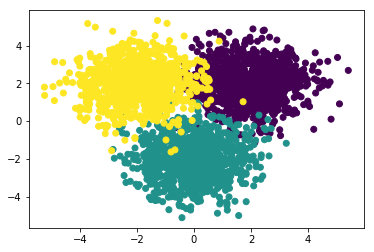

In [4]:
if __name__ == "__main__":
	main()